In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
file = 'Bands_1.csv'


In [4]:
# A Python3 program to check if a given point 
# lies inside a given polygon
# Refer https://www.geeksforgeeks.org/check-if-two-given-line-segments-intersect/
# for explanation of functions onSegment(),
# orientation() and doIntersect() 
 
# Define Infinite (Using INT_MAX 
# caused overflow problems)
INT_MAX = 10000
 
# Given three collinear points p, q, r, 
# the function checks if point q lies
# on line segment 'pr'
def onSegment(p:tuple, q:tuple, r:tuple) -> bool:
     
    if ((q[0] <= max(p[0], r[0])) &
        (q[0] >= min(p[0], r[0])) &
        (q[1] <= max(p[1], r[1])) &
        (q[1] >= min(p[1], r[1]))):
        return True
         
    return False
 
# To find orientation of ordered triplet (p, q, r).
# The function returns following values
# 0 --> p, q and r are collinear
# 1 --> Clockwise
# 2 --> Counterclockwise
def orientation(p:tuple, q:tuple, r:tuple) -> int:
     
    val = (((q[1] - p[1]) *
            (r[0] - q[0])) -
           ((q[0] - p[0]) *
            (r[1] - q[1])))
            
    if val == 0:
        return 0
    if val > 0:
        return 1 # Collinear
    else:
        return 2 # Clock or counterclock
 
def doIntersect(p1, q1, p2, q2):
     
    # Find the four orientations needed for 
    # general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
 
    # General case
    if (o1 != o2) and (o3 != o4):
        return True
     
    # Special Cases
    # p1, q1 and p2 are collinear and
    # p2 lies on segment p1q1
    if (o1 == 0) and (onSegment(p1, p2, q1)):
        return True
 
    # p1, q1 and p2 are collinear and
    # q2 lies on segment p1q1
    if (o2 == 0) and (onSegment(p1, q2, q1)):
        return True
 
    # p2, q2 and p1 are collinear and
    # p1 lies on segment p2q2
    if (o3 == 0) and (onSegment(p2, p1, q2)):
        return True
 
    # p2, q2 and q1 are collinear and
    # q1 lies on segment p2q2
    if (o4 == 0) and (onSegment(p2, q1, q2)):
        return True
 
    return False
 
# Returns true if the point p lies 
# inside the polygon[] with n vertices
def is_inside_polygon(points:list, p:tuple) -> bool:
     
    n = len(points)
     
    # There must be at least 3 vertices
    # in polygon
    if n < 3:
        return False
         
    # Create a point for line segment
    # from p to infinite
    extreme = (INT_MAX, p[1])
     
    # To count number of points in polygon
      # whose y-coordinate is equal to
      # y-coordinate of the point
    decrease = 0
    count = i = 0
     
    while True:
        next = (i + 1) % n
         
        if(points[i][1] == p[1]):
            decrease += 1
         
        # Check if the line segment from 'p' to 
        # 'extreme' intersects with the line 
        # segment from 'polygon[i]' to 'polygon[next]'
        if (doIntersect(points[i],
                        points[next],
                        p, extreme)):
                             
            # If the point 'p' is collinear with line 
            # segment 'i-next', then check if it lies 
            # on segment. If it lies, return true, otherwise false
            if orientation(points[i], p,
                           points[next]) == 0:
                return onSegment(points[i], p,
                                 points[next])
                                  
            count += 1
             
        i = next
         
        if (i == 0):
            break
             
    # Reduce the count by decrease amount
      # as these points would have been added twice
    count -= decrease
     
    # Return true if count is odd, false otherwise
    return (count % 2 == 1)
 
# Driver code
# if __name__ == '__main__':
    
#   polygon1 = [ (78.052657, 13.120414), (78.052934, 13.120436), (78.052898, 13.120601), (78.052657, 13.120588), (78.052657, 13.120414) ]
    
#   L1 = [()]
#   L1_new = []
#   for p in L1:
#       if (is_inside_polygon(points = polygon1, p = p)):
#           L1_new.append(p)
#       else:
#           pass
      
#   polygon1 = [ (78.052657, 13.120414), (78.052934, 13.120436), (78.052898, 13.120601), (78.052657, 13.120588), (78.052657, 13.120414) ]
  

#   if (is_inside_polygon(points = polygon1, p = p)):
#     print ('Yes')
#   else:
#     print ('No')

#   polygon2 = [ (0, 0), (5, 0), (5, 5), (3, 3) ]
    
#   L2 = [()]
#   L2_new = []
#   for p in L2:
#       if (is_inside_polygon(points = polygon2, p = p)):
#           L2_new.append(p)
#       else:
#           pass

In [5]:
polygon1 =  [ ( 78.19440501392705, 13.13144792604561 ), ( 78.20191022097467, 13.13144792604561 ), ( 78.20191022097467, 13.13765235639166 ), ( 78.19440501392705, 13.13765235639166 ), ( 78.19440501392705, 13.13144792604561 ) ]
polygon2 = [ (78.050865, 13.122777), (78.050887, 13.122639), (78.0511639, 13.120601), (78.051021, 13.120588), (78.050865, 13.120414) ]

In [6]:
data = pd.read_csv(file)
poly1_coordinates = []
poly2_coordinates = []

In [7]:
coordinates = data['.geo']

In [8]:
print(len(coordinates.unique()))

40


In [9]:
x_coordinates = []
y_coordinates = []

In [10]:
for coord in coordinates:
  comma_pos = 1
  for i, chr in enumerate(coord[31:]):
    if chr == ',':
      comma_pos = i
      break
  
  x = float(coord[31:31+ comma_pos])
  x_coordinates.append(x)
  y = float(coord[32+ comma_pos:-2])
  y_coordinates.append(y)
  print((x, y))
  if is_inside_polygon(polygon1, (x, y)):
    poly1_coordinates.append((x, y))
  elif is_inside_polygon(polygon2, (x, y)):
    poly2_coordinates.append((x, y))

(78.15656917243544, 12.826418155727978)
(78.74163931502379, 12.780724791715844)
(77.9756836721797, 13.447137548045394)
(77.8583194257387, 12.642488191446043)
(77.8488947210855, 12.928129788553226)
(78.76999819878446, 13.123839871754672)
(78.44728713133662, 13.154421994809873)
(78.6685633848612, 13.42648195272544)
(78.53625708568862, 13.398857569739622)
(78.41007188651287, 13.159892406141664)
(78.16117096699932, 13.19461470745829)
(77.79906107857616, 13.217468148692896)
(77.97513786887525, 13.400549747035063)
(77.86477825038698, 13.212011340461606)
(78.69620036706614, 13.292024658742813)
(78.76905041123155, 13.065725960355028)
(78.45000107859391, 13.351370996365485)
(78.66963970898082, 13.497252313592385)
(78.01343168962137, 13.204077911554705)
(78.41316871093372, 13.386576816204531)
(78.15010810157095, 13.149810389665896)
(77.7919039989731, 12.575742495004821)
(77.96690227321356, 12.713499397578)
(77.8657372026921, 13.338184193857067)
(78.76477270379647, 12.761154308311077)
(78.7472283

In [11]:
x_poly1 = []
y_poly1 = []
for coord in polygon1:
  x, y = coord
  x_poly1.append(x)
  y_poly1.append(y) 

In [12]:
print(polygon1)
print(x_poly1)

[(78.19440501392705, 13.13144792604561), (78.20191022097467, 13.13144792604561), (78.20191022097467, 13.13765235639166), (78.19440501392705, 13.13765235639166), (78.19440501392705, 13.13144792604561)]
[78.19440501392705, 78.20191022097467, 78.20191022097467, 78.19440501392705, 78.19440501392705]


In [13]:
print(y_poly1)

[13.13144792604561, 13.13144792604561, 13.13765235639166, 13.13765235639166, 13.13144792604561]


220


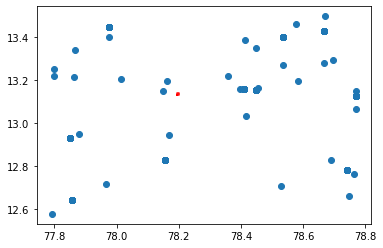

<Figure size 7200x7200 with 0 Axes>

In [18]:
# for i in range(len(x_coordinates)):
  # plt.scatter(x_coordinates[i], y_coordinates[i])
  # plt.plot(x_poly1, y_poly1)
  # plt.show()
print(len(x_coordinates))
plt.scatter(x_coordinates, y_coordinates)
plt.plot(x_poly1, y_poly1,color = 'red')
plt.figure(figsize=(100, 100))
plt.show()

In [15]:
print(poly1_coordinates)

[]


In [16]:
print(poly2_coordinates)

[]


In [17]:
print()